In [2]:
import cv2

In [2]:
!pip install opencv-python

In [3]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

In [4]:
import os
os.chdir('C:\\Users\\user 13\\Downloads\\MBM_data\\MBM_data')

In [5]:
from PIL import Image
pic=Image.open('h1.png')

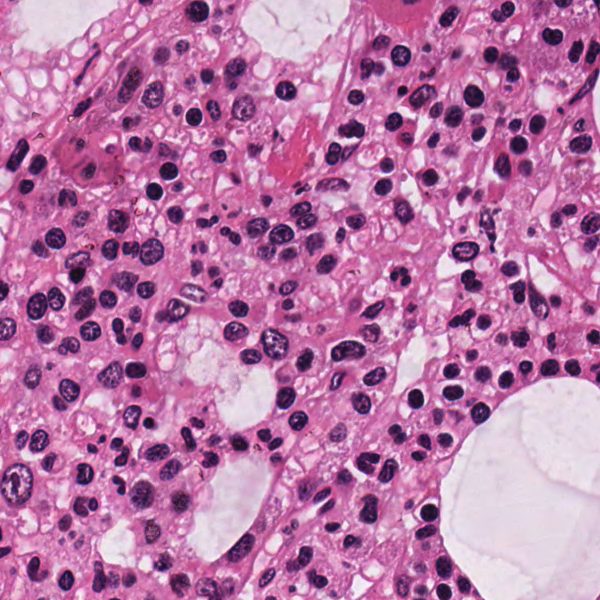

In [6]:
pic

In [7]:
type(pic)

PIL.PngImagePlugin.PngImageFile

In [8]:
pic_arr=np.asarray(pic)

In [9]:
print(pic_arr)

[[[212 114 171]
  [204 106 163]
  [200 102 163]
  ...
  [ 35  17  41]
  [ 42  17  49]
  [ 53  28  60]]

 [[211 117 177]
  [202 108 168]
  [197 103 164]
  ...
  [ 30  17  37]
  [ 34  12  48]
  [ 43  21  57]]

 [[204 111 176]
  [195 102 167]
  [191 101 163]
  ...
  [ 30  16  50]
  [ 38  15  67]
  [ 47  24  76]]

 ...

 [[163  72 139]
  [168  77 144]
  [179  90 146]
  ...
  [152 113 150]
  [135  60 127]
  [137  62 129]]

 [[156  65 132]
  [170  79 146]
  [191  97 155]
  ...
  [134  82 139]
  [138  55 111]
  [153  70 126]]

 [[158  65 130]
  [176  83 148]
  [202 104 163]
  ...
  [129  63 135]
  [153  63 109]
  [171  81 127]]]


In [10]:
print(pic_arr.shape)

(600, 600, 3)


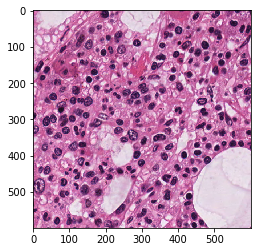

In [11]:
plt.imshow(pic_arr)

In [12]:
pic_red=pic_arr.copy()

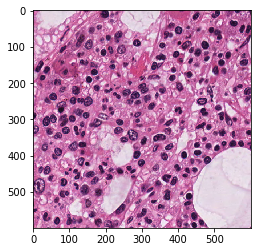

In [13]:
plt.imshow(pic_red)


In [14]:
pic_red[0]

array([[212, 114, 171],
       [204, 106, 163],
       [200, 102, 163],
       ...,
       [ 35,  17,  41],
       [ 42,  17,  49],
       [ 53,  28,  60]], dtype=uint8)

In [15]:
pic_red[:,:,0]

array([[212, 204, 200, ...,  35,  42,  53],
       [211, 202, 197, ...,  30,  34,  43],
       [204, 195, 191, ...,  30,  38,  47],
       ...,
       [163, 168, 179, ..., 152, 135, 137],
       [156, 170, 191, ..., 134, 138, 153],
       [158, 176, 202, ..., 129, 153, 171]], dtype=uint8)

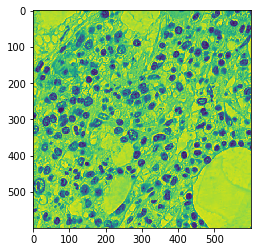

In [16]:
#RED Chennel
plt.imshow(pic_arr[:,:,0])

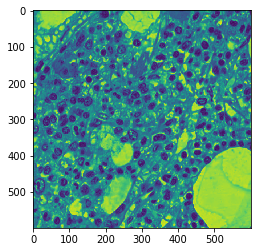

In [17]:
#GREEN Channel
plt.imshow(pic_arr[:,:,1])

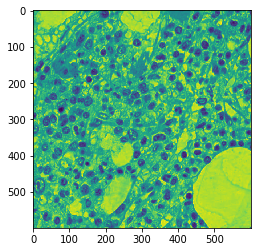

In [18]:
#BLUE Channel
plt.imshow(pic_arr[:,:,2])

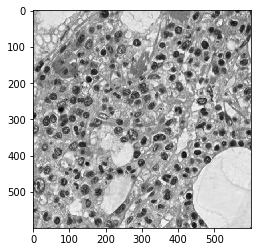

In [19]:
plt.imshow(pic_arr[:,:,2],cmap='gray')

In [20]:
if(pic_red[:,:,1].any()<255):
    print("yes")

yes


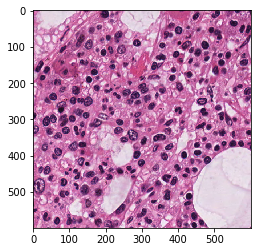

In [21]:
plt.imshow(pic_red)

In [22]:
img=cv.imread('histological.png',0)

In [23]:
type(img)

numpy.ndarray

In [24]:
th,binary_img=cv.threshold(pic_arr[:,:,2],127,255,cv.THRESH_BINARY)

In [25]:
#gray = cv2.cvtColor(binary_img, cv2.COLOR_BGR2GRAY)
binary_img[0]

array([255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 25

Text(0.5, 1.0, 'Binary Image')

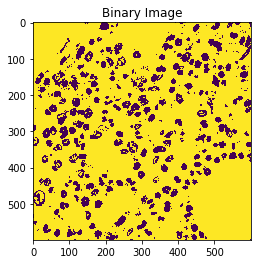

In [26]:
plt.imshow(binary_img)
plt.title("Binary Image")

In [27]:
#threshold applied array of  binary image
print(binary_img)
type(binary_img)

[[255 255 255 ...   0   0   0]
 [255 255 255 ...   0   0   0]
 [255 255 255 ...   0   0   0]
 ...
 [255 255 255 ... 255   0 255]
 [255 255 255 ... 255   0   0]
 [255 255 255 ... 255   0   0]]


numpy.ndarray

In [28]:
# defining the kernel i.e. Structuring element 
kernel=cv.getStructuringElement(cv.MORPH_ELLIPSE,(5,5))

In [29]:
#applying morphological opration(opening) on binary image
opening_img =cv2.morphologyEx(binary_img, cv2.MORPH_OPEN, kernel)

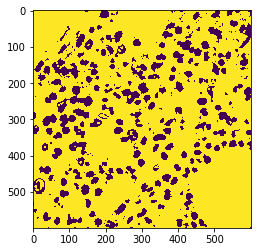

In [30]:
plt.imshow(opening_img)

In [48]:
## findcontours
cnts = cv2.findContours(opening_img, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)[-2]


## filter by area
s1= 3
s2 = 1000
xcnts = []
for cnt in cnts:
    if s1<cv2.contourArea(cnt) <s2:
        xcnts.append(cnt)

print("Total number of Nuclei Cells are: {}".format(len(xcnts)))

Total number of Nuclei Cells are: 388
